In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
ny_data = pd.read_csv('Downloads/nyc_taxi_trip_duration.csv')

In [3]:
ny_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
ny_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [5]:
ny_data.shape

(729322, 11)

In [6]:
ny_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
ny_data['pickup_datetime'] = pd.to_datetime(ny_data['pickup_datetime'])
ny_data['dropoff_datetime'] = pd.to_datetime(ny_data['dropoff_datetime'])

In [9]:
ny_data['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

Value counts for store_and_fwd_flag
N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64


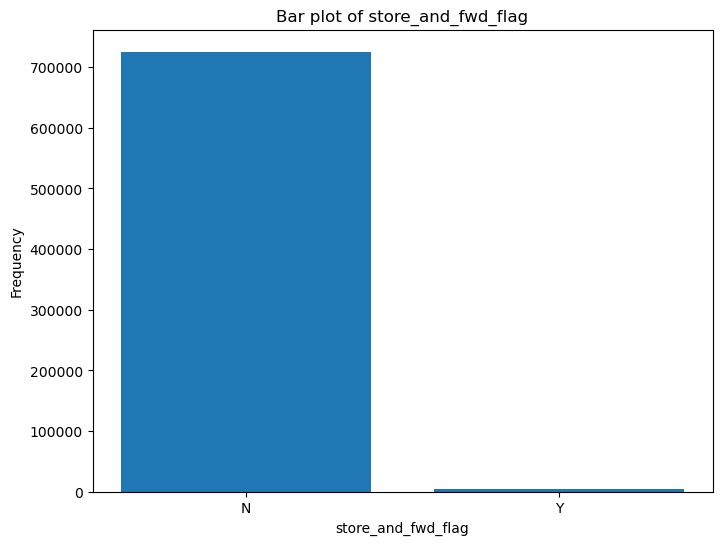

In [40]:
cat_var = 'store_and_fwd_flag'
value_counts = ny_data[cat_var].value_counts()
print('Value counts for', cat_var)
print(value_counts)

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(cat_var)
plt.ylabel('Frequency')
plt.title('Bar plot of ' + cat_var)
plt.show()

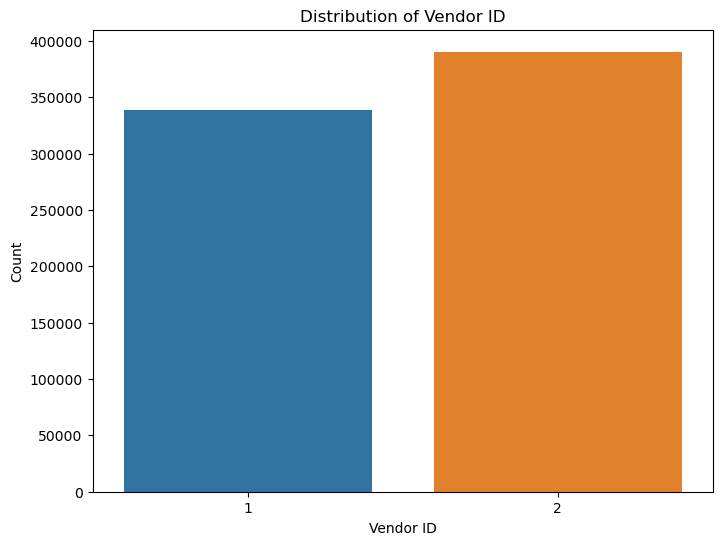

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='vendor_id', data=ny_data)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.title('Distribution of Vendor ID')
plt.show()

/var/folders/t9/8c08pwjj30s24cbltf_qtq2c0000gn/T/ipykernel_77085/437023133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ny_data.corr()


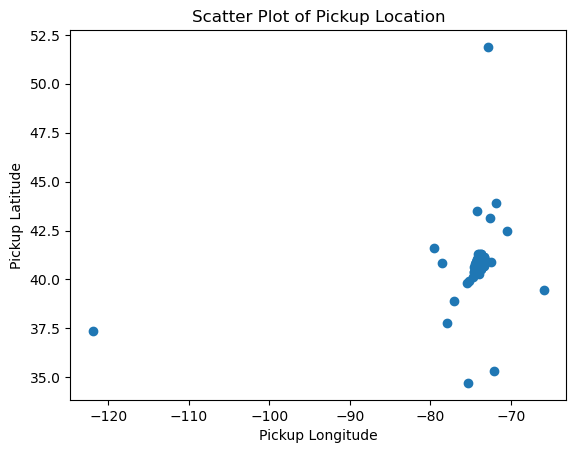

In [11]:
ny_data.corr()

plt.scatter(ny_data['pickup_longitude'], ny_data['pickup_latitude'])
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Scatter Plot of Pickup Location')
plt.show()


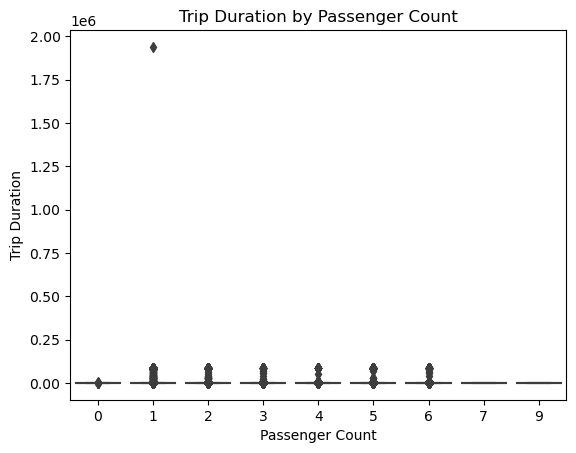

In [12]:
sns.boxplot(x=ny_data['passenger_count'], y=ny_data['trip_duration'])
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Passenger Count')
plt.show()


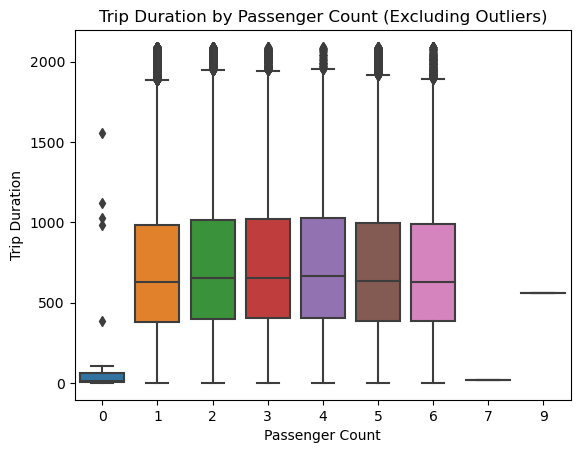

In [13]:
# adding onto above code to exclude the outliers
q1 = ny_data['trip_duration'].quantile(0.25)
q3 = ny_data['trip_duration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

updated_data = ny_data[(ny_data['trip_duration'] >= lower_bound) & (ny_data['trip_duration'] <= upper_bound)]

sns.boxplot(x=updated_data['passenger_count'], y=updated_data['trip_duration'])
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Passenger Count (Excluding Outliers)')
plt.show()


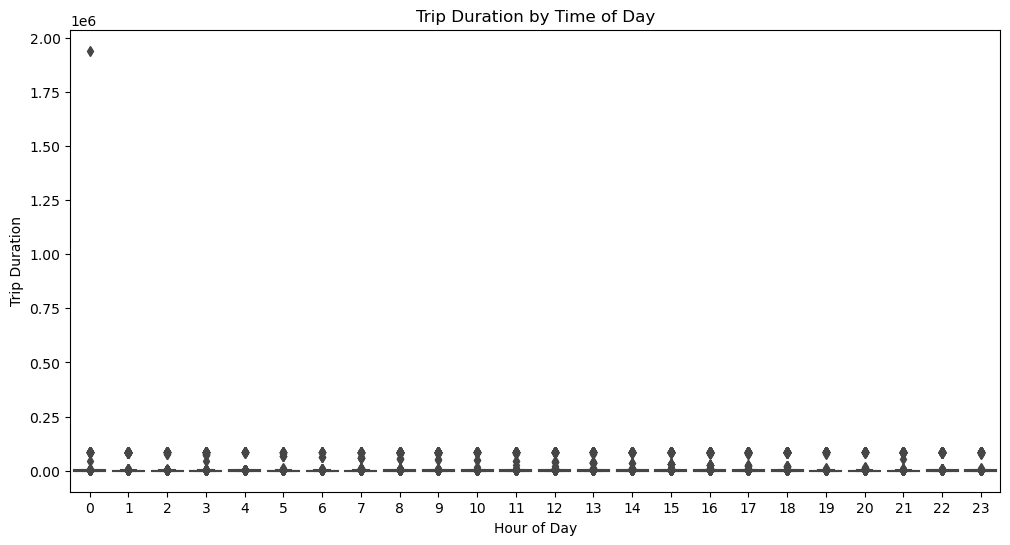

In [14]:
ny_data['pickup_datetime'] = pd.to_datetime(ny_data['pickup_datetime'])
ny_data['hour'] = ny_data['pickup_datetime'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(x=ny_data['hour'], y=ny_data['trip_duration'])
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Time of Day')
plt.show()


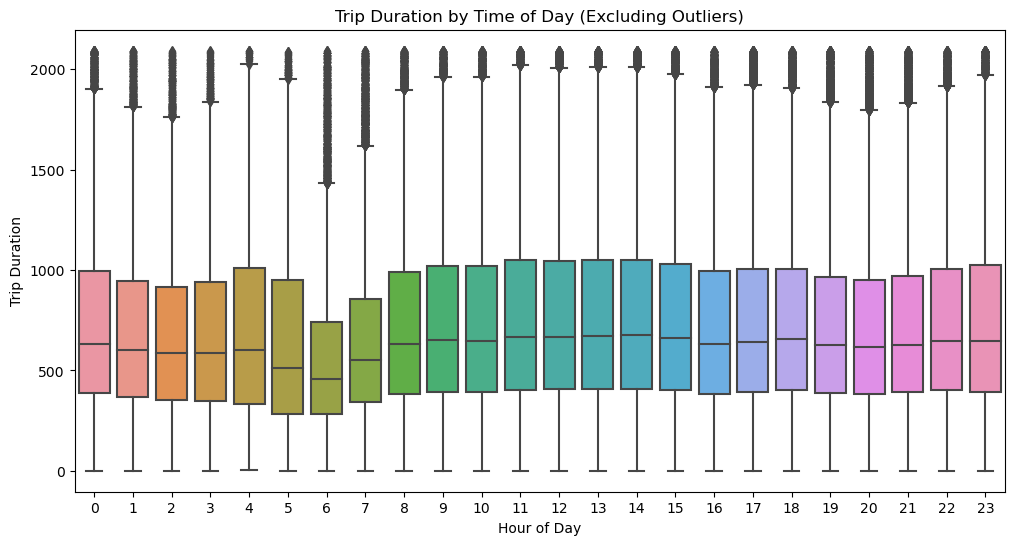

In [15]:
# adding onto above code to exclude the outliers
ny_data['pickup_datetime'] = pd.to_datetime(ny_data['pickup_datetime'])
ny_data['hour'] = ny_data['pickup_datetime'].dt.hour

q1 = ny_data['trip_duration'].quantile(0.25)
q3 = ny_data['trip_duration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = ny_data[(ny_data['trip_duration'] >= lower_bound) & (ny_data['trip_duration'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_data['hour'], y=filtered_data['trip_duration'])
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Time of Day (Excluding Outliers)')
plt.show()


In [30]:
ny_data['is_morning_trip'] = ny_data['pickup_hour'].apply(lambda x: 1 if 6 <= x <= 11 else 0)
print(ny_data['is_morning_trip'])

0         0
1         0
2         0
3         1
4         1
         ..
729317    0
729318    0
729319    0
729320    1
729321    0
Name: is_morning_trip, Length: 729322, dtype: int64


In [35]:
vendor_1_durations = ny_data[ny_data['vendor_id'] == 1]['trip_duration']
vendor_2_durations = ny_data[ny_data['vendor_id'] == 2]['trip_duration']
t_statistic, p_value = stats.ttest_ind(vendor_1_durations, vendor_2_durations)
print('T-Value:', t_statistic)
print('P-Value:', p_value)


T-Value: -23.709229260516818
P-Value: 3.228422510941252e-124


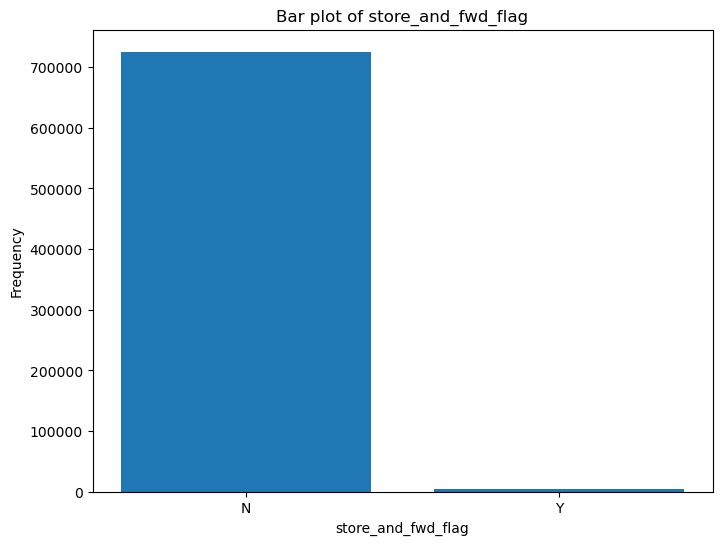

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(cat_var)
plt.ylabel('Frequency')
plt.title('Bar plot of ' + cat_var)
plt.show()